In [306]:
#se importan las librerias
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import tkinter as tk

um=1e-6
mm=1e-3
nm=1e-9
cm=1e-2

In [318]:
#Lectura de la imagen
Gala = cv2.imread('gala-desnuda-mirando.jpg',0)

In [320]:
#Función que representa la vista de una imagen a diferentes distancia inorando el escalado de imagen
def Vistaojohumano(Gala,z1,Wl):
    #Distancia axial entre el cristalino y la retina del ojo humano promedio
    z2 =23*mm
    #Radio promedio la pupila del ojo humano en buenas condiciones de iluminación
    #Debido a un cambio de las dimensiones del espectro de frecuencias de la función pupila se considera un cambio
        # en las dimensiones espaciales de la pupila debido a la distancia del plano objeto
    radio = int(((2*mm/(z1*Wl))))
    mask=np.zeros(np.shape(Gala))
    M,N = np.shape(Gala)

    Mag =  -z2 / z1
    cv2.circle(mask,(int(N/2),int(M/2)),radio,1,-1)

    #Función de respeusta al impulso de la lente considerando un sistema formador de imagenes
    Hi = (1/((Wl**2)*(z1*z2)))*np.fft.fft2(mask)
    Hi2 = (1/np.abs(Mag))*Hi

    U_g=(1/np.abs(Mag))*Gala

    ConA = np.fft.fftshift(np.fft.fft2(Hi2))
    ConB = (np.fft.fft2(U_g))
    #Convolución 
    Con = np.fft.ifftshift(np.fft.ifft2(np.abs(ConA)*ConB))

    return np.abs(np.fft.ifftshift(Con))**2


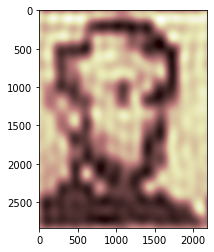

In [317]:
Wl = 633*nm
Distancia = 250
plt.imshow(Vistaojohumano(Gala,Distancia,Wl),cmap="pink")

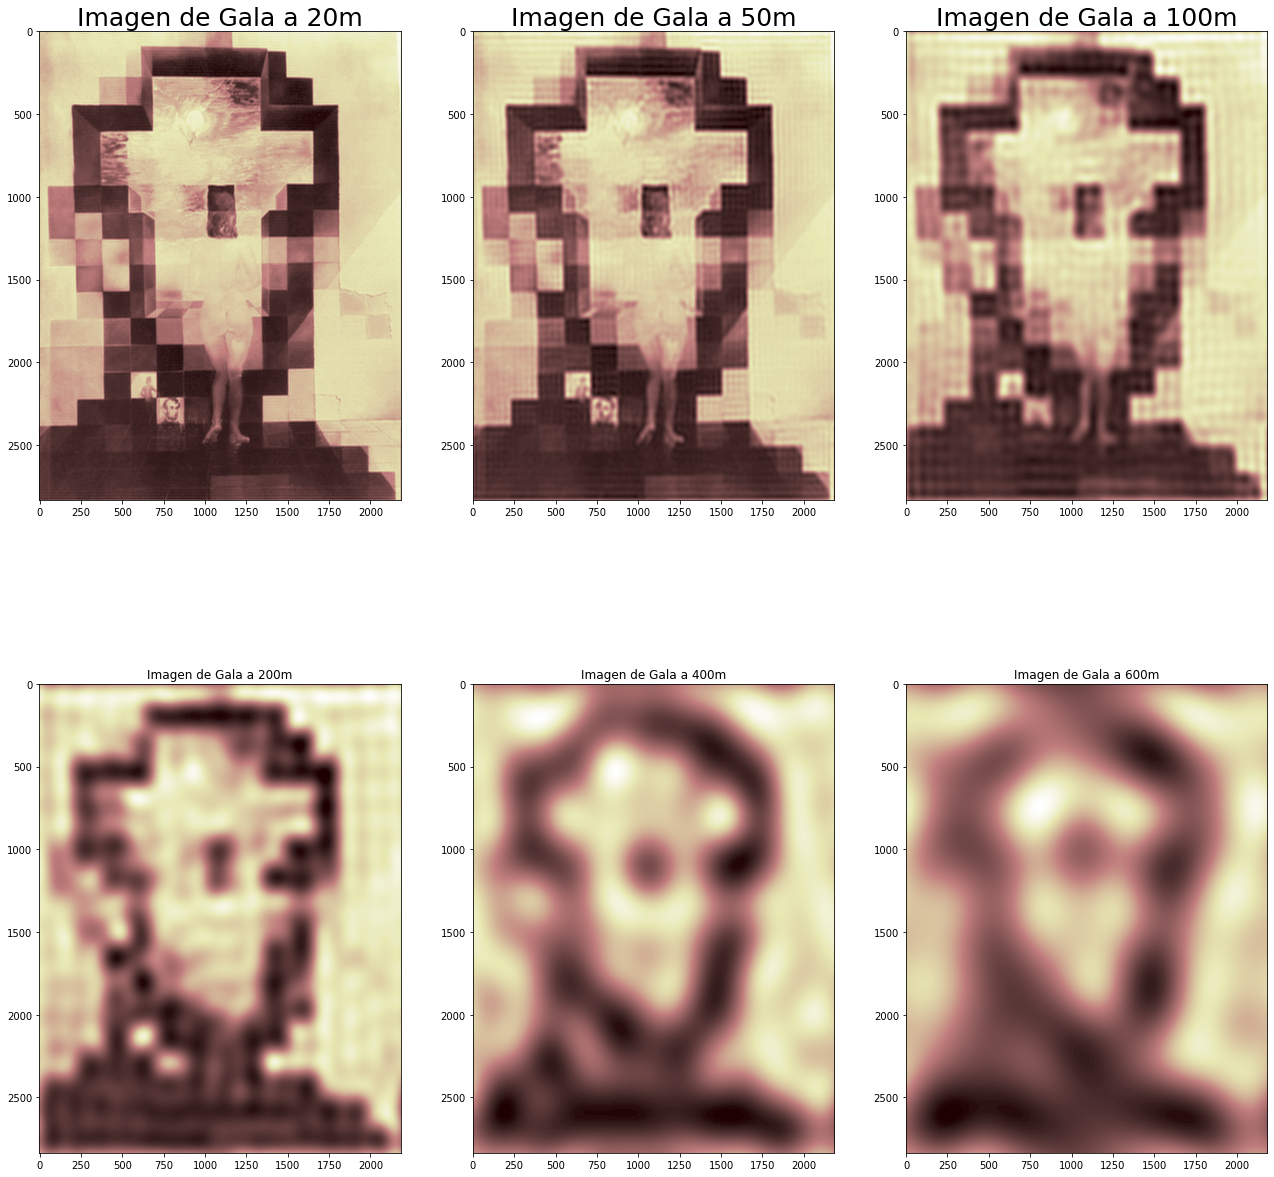

In [11]:
#Diferentes vistas de la imagen de gala a diferentes distancia bajo un luz monocromatica de 633nm
Wl = 633*nm

fig, ax = plt.subplots(2,3,figsize=(22, 22))
ax[0][0].imshow(Vistaojohumano(Gala,20,Wl),cmap="pink")
ax[0][0].set_title("Imagen de Gala a 20m",size = 25)
ax[0][1].imshow(Vistaojohumano(Gala,50,Wl),cmap="pink")
ax[0][1].set_title("Imagen de Gala a 50m",size = 25)
ax[0][2].imshow(Vistaojohumano(Gala,100,Wl),cmap="pink")
ax[0][2].set_title("Imagen de Gala a 100m",size = 25)
ax[1][0].imshow(Vistaojohumano(Gala,200,Wl),cmap="pink")
ax[1][0].set_title("Imagen de Gala a 200m")
ax[1][1].imshow(Vistaojohumano(Gala,400,Wl),cmap="pink")
ax[1][1].set_title("Imagen de Gala a 400m")
ax[1][2].imshow(Vistaojohumano(Gala,600,Wl),cmap="pink")
ax[1][2].set_title("Imagen de Gala a 600m")
plt.show()

Text(0.5, 1.0, 'Imagen de Gala a 400m')

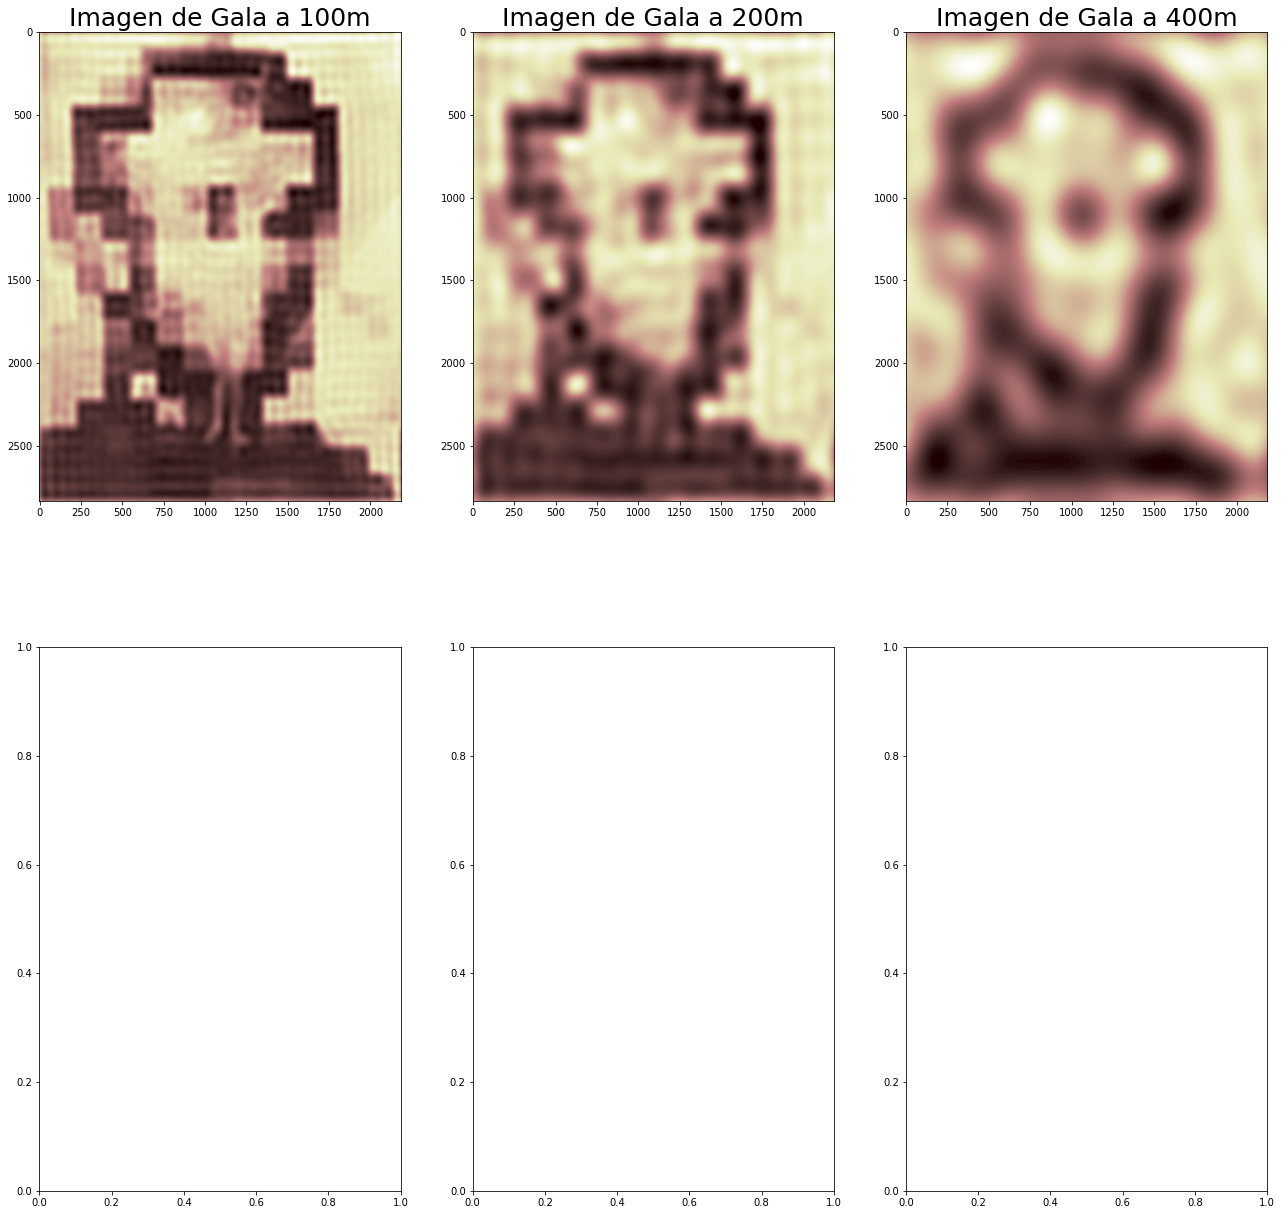

In [12]:
fig, ax = plt.subplots(2,3,figsize=(22, 22))
ax[0][0].imshow(Vistaojohumano(Gala,100,Wl),cmap="pink")
ax[0][0].set_title("Imagen de Gala a 100m",size = 25)
ax[0][1].imshow(Vistaojohumano(Gala,200,Wl),cmap="pink")
ax[0][1].set_title("Imagen de Gala a 200m",size = 25)
ax[0][2].imshow(Vistaojohumano(Gala,400,Wl),cmap="pink")
ax[0][2].set_title("Imagen de Gala a 400m",size = 25)

\subsection{Teoría}

\begin{figure}[H]
    \centering
    \includegraphics[scale = 0.5]{images/Agudezavisual.PNG}
    \caption{Ángulo de visión que establece la separación de 2 puntos próximos entre si de manera que un observador pueda diferenciarlos. \ref{av}}
    \label{agv}
\end{figure}

La agudeza visual de un observador humano promedio con visión 20/20 en el test de Snellen es de 1, lo que significa que su capacidad visual para diferenciar dos puntos próximos entre si está limitada por un ángulo de 1 minuto de arco entre los caminos ópticos de cada punto con el observador \ref{av}.

\begin{equation}\label{eav}
\begin{split}
    \tan{\alpha} = \frac{A}{d}
\end{split}
\end{equation}

La ecuación \ref{eav} expresa la relación entre el algulo de visión $\alpha$ de la agudeza visual, $A$ la separación minima entre dos puntos que se pueden discernir y $d$ la distancia entre el observador y el plano de onservación.

El efecto de doble imagen se da al codificar una primera imagen en los detalles de una segunda, de esta manera el observador percibe una imagen u otra según la intención prestada a los detalles de la imagen compuesta y la distancia entre el observador y la imagen, si el observador se encuentra a una distancia tal que no puede discernir los detalles de la imagen codificada en la imagen compuesta, este solo podrá percibir la segunda imagen que contiene a la primera.

\begin{figure}[H]
    \centering
    \includegraphics[scale = 0.4]{images/GalaAcuadros.PNG}
    \caption{"Gala Contempla el mar mediterráneo Que en Veinte Metros Se convierte el retrato de Abraham Lincoln - Homenaje a Rothko" donde se resalta la cantidad de píxeles horizontales de la obra.}
    \label{gala}
\end{figure}

En 1976 Salvador Dalí presenta su obra "Gala Contempla el mar mediterráneo Que en Veinte Metros Se convierte el retrato de Abraham Lincoln - Homenaje a Rothko" la cual presenta el efecto de doble imagen al representar una versión macropixelada del rostro del presidente Lincon el cual es sus detalles contiene la imagen de una Mujer observando el mar a través de una ventana, la obra completa posee unas dimensiones de $4.2m$ de alto y $3.18m$ de ancho, los píxeles del rostro macropixelado del presidente Lincon poseen una dimensiones de aproximadamente $22.75cm$ como se muestra en la figura \ref{gala}.

La distancia apartir la cual un observador humano promedio reconocerá el rostro del presidente Lincon varia según la percepción y la experience de quien observa, sin embargo, a una distancia lo suficientemente lejana los detalles que se encuentra en el interior de los pixeles no podrán ser diferenciados de manera que se pierde la noción de la mujer observando el mar, considerando el tamaño de pixel del rostro del presidente Lincon y según la ecuación \ref{eav} para una angulo de visión de 1 minuto de arco se obtiene que la distancia minima en la cual aparece el rostro del presidente Lincon es de $Inserte aqui eso$.

$ \tan{\alpha} = \frac{A}{d}$


$U_g(u,v)=\frac{1}{|M|}U_{0}(\frac{u}{M},\frac{v}{M})$

$h(u,v) = \int\int_{\infty}^{-\infty} P(\lambda zX,\lambda zY)\exp{-i2\pi(uX,vY)}dxdy$

$X = \frac{x}{\lambda z}$
$Y = \frac{y}{\lambda z}$
$H = \frac{1}{|M|} h$

$U_i(u,v) = H(u,v) \otimes U_g(u,v)$

El ojo humano promedio puede describirse como un sistema optico que consta de una pupila y una unica lente positiva delgada (el cristalino del ojo) la cual puede cambiar su radio de curvatura para mantener enfocada la imagen que recibe el observador, debido a esta caracteristica de enfoque el sistema optico completo se considera un sistema formador de imagenes el cual siempre cumple la ecuación de formación de imagenes de modo que:

\begin{equation}\label{formai}
\begin{split}
    \frac{1}{z1} + \frac{1}{z2} = \frac{1}{f}
\end{split}
\end{equation}

Considerando que para el ojo humano promedio la ecuación \ref{formai} siempre se cumple, se puede describir un campo de salida apartir del campo de entrada y la función de respuesta al impulso del sistema completo de manera que:

\begin{equation}\label{sfi}
\begin{split}
    U_i(u,v) = H(u,v) \otimes U_g(u,v)
\end{split}
\end{equation}

Siendo 

\begin{equation}\label{sfi2}
\begin{split}
     U_g(u,v)=\frac{1}{|M|}U_{0}(\frac{u}{M},\frac{v}{M})

     y
      h(u,v) = \int\int_{\infty}^{-\infty} P(\lambda zX,\lambda zY)\exp{-i2\pi(uX,vY)}dxdy

      con   $X = \frac{x}{\lambda z}$
            $Y = \frac{y}{\lambda z}$
            $H = \frac{1}{|M|} h$

\end{split}
\end{equation}

De las ecuaciones \ref{sfi2} se observa que la función de respuesta al impulso del sistema corresponde a la transformada de fourier de la función pupila escalada del sistema y el campo de entrada toma la forma descrita por la optica geometrica con $M = \frac{-z_2}{z_1}$ siendo $z_1 y z_2$ las distancias del plano objeto a la lente y de la lente al plano imagen respectivamente.

Para el ojo humano promedio la distancia $z_2$ describe la distancia entre el cristalino y la retina, esta distancia es de aproximadamente $23mm$, de igual manera el radio de la pupila es de aproximadamente $2mm$ bajo buenas condiciones de iluminación.

\begin{figure}[H]
    \centering
    \includegraphics[scale = 0.5]{images/DiferentesDistancias.png}
    \caption{Representanción de la percepción de la obra por parte de un observador humano promedioa a diferentes distancias}}
    \label{dd}
\end{figure}

Al emplear numericamente las escuaciones descritas en \ref{sfi} y \ref{sfi2}, considerando la vista de la imagen resultante desde el plano objeto de manera que $z$ es la distancia del plano objeto al cristalino se obtienen diferentes imagenes que representan la percepción de la obra a diferentes distancias tal y como se muestra en la figura  \ref{dd}.